<a href="https://colab.research.google.com/github/JuanZapa7a/Hello-world/blob/readme-edits/2_Operaciones_sobre_Imagenes_(Numpy_Arrays).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Utilizando operaciones simples de NumPy para manipular imágenes

Este script ilustra cómo utilizar operaciones básicas de NumPy, como el corte (slicing), máscaras y la indexación avanzada, para modificar los valores de píxeles de una imagen.

Este código carga una imagen de "microaneurysms" y realiza diversas operaciones para modificar sus valores de píxeles, estableciendo algunos píxeles en negro, otros en blanco y creando un patrón en la imagen. Luego, muestra la imagen resultante en una figura.

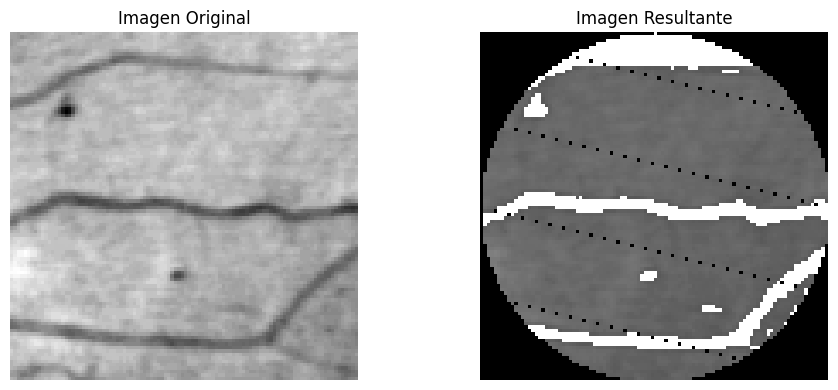

In [5]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

# Cargar la imagen "microaneurysms" de scikit-image
image_original = data.microaneurysms().copy()  # Copiamos la imagen original

# Establecer los primeros 10 píxeles de la imagen en negro (valor 0)
image = image_original.copy()  # Hacemos una copia para trabajar en ella
image[:10] = 0

# Crear una máscara que identifica los píxeles con valores menores a 87
mask = image < 87

# Establecer los píxeles que cumplen con la condición de la máscara en blanco (valor 255)
image[mask] = 255

# Crear índices para seleccionar píxeles específicos y establecer sus valores en negro (valor 0)
inds_x = np.arange(len(image))
inds_y = (4 * inds_x) % len(image)
image[inds_x, inds_y] = 0

# Obtener las dimensiones de la imagen
l_x, l_y = image.shape[0], image.shape[1]

# Crear una malla de coordenadas (X, Y) que representa las coordenadas de los píxeles en la imagen
X, Y = np.ogrid[:l_x, :l_y]

# Crear una máscara llamada "outer_disk_mask" que identifica los píxeles fuera de un círculo centrado en la imagen
outer_disk_mask = (X - l_x / 2)**2 + (Y - l_y / 2)**2 > (l_x / 2)**2

# Establecer los píxeles fuera del círculo en negro (valor 0)
image[outer_disk_mask] = 0

# Crear subplots para mostrar la imagen original y la imagen resultante
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].set_title("Imagen Original")
axes[0].imshow(image_original, cmap='gray')
axes[0].axis('off')

axes[1].set_title("Imagen Resultante")
axes[1].imshow(image, cmap='gray')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# 2. Generar huellas (elementos estructurantes)

Este ejemplo muestra cómo utilizar las funciones en skimage.morphology para generar huellas (elementos estructurantes) para su uso en operaciones de morfología. El título de cada gráfico indica la llamada de la función.

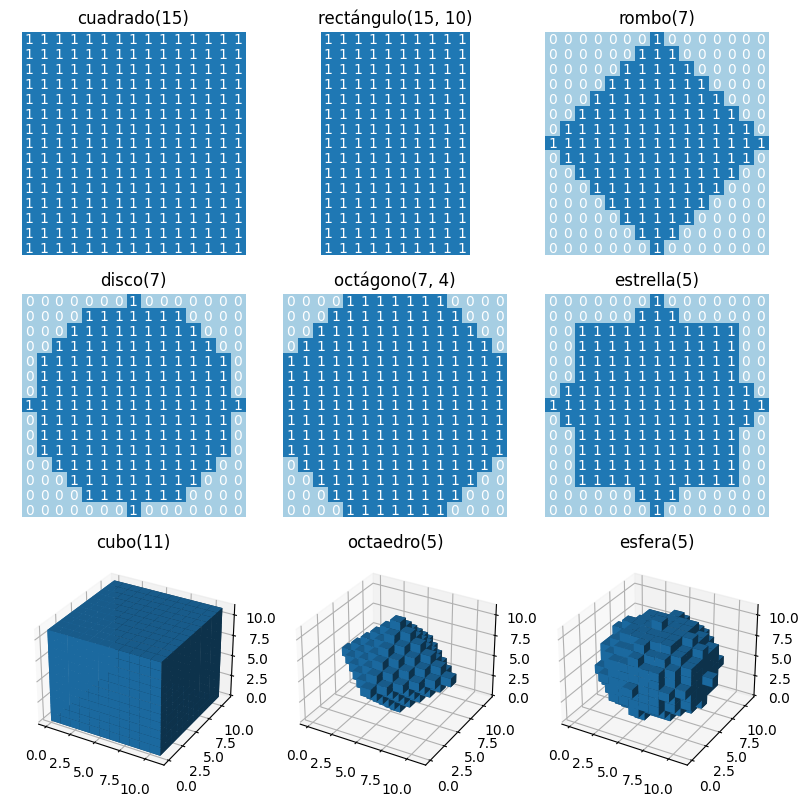

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)

# Generar elementos estructurantes 2D y 3D.
elementos = [
    ("cuadrado(15)", square(15)),
    ("rectángulo(15, 10)", rectangle(15, 10)),
    ("rombo(7)", diamond(7)),
    ("disco(7)", disk(7)),
    ("octágono(7, 4)", octagon(7, 4)),
    ("estrella(5)", star(5)),
    ("cubo(11)", cube(11)),
    ("octaedro(5)", octahedron(5)),
    ("esfera(5)", ball(5))
]

# Visualizar los elementos en subplots de 3x3.
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, (titulo, elemento) in enumerate(elementos):  # Tomar los primeros 9 elementos
    ax = axes[i // 3, i % 3]
    if i < 6:
        ax.imshow(elemento, cmap="Paired", vmin=0, vmax=12)
        for x in range(elemento.shape[0]):
            for y in range(elemento.shape[1]):
                ax.text(y, x, elemento[x, y], ha="center", va="center", color="w")
    else:
        ax_3d = fig.add_subplot(3, 3, i + 1, projection='3d')
        ax_3d.voxels(elemento)
    ax.set_axis_off()
    ax.set_title(titulo)

fig.tight_layout()
plt.show()



